# Procesamiento de Imágenes
## Trabajo Practico 3 - Operadores morfológicos

In [1]:
import cv2
from PIL import Image
import os   
import numpy as np
import matplotlib.pyplot as plt

1. Erosi´on y dilataci´on b´asicas: Aplicar erosi´on y dilataci´on sobre una imagen binaria. Usar diferentes
tama˜nos de kernel. Comparar la imagen original y la resultante de aplicar el operador. Comentar
los efectos visuales.

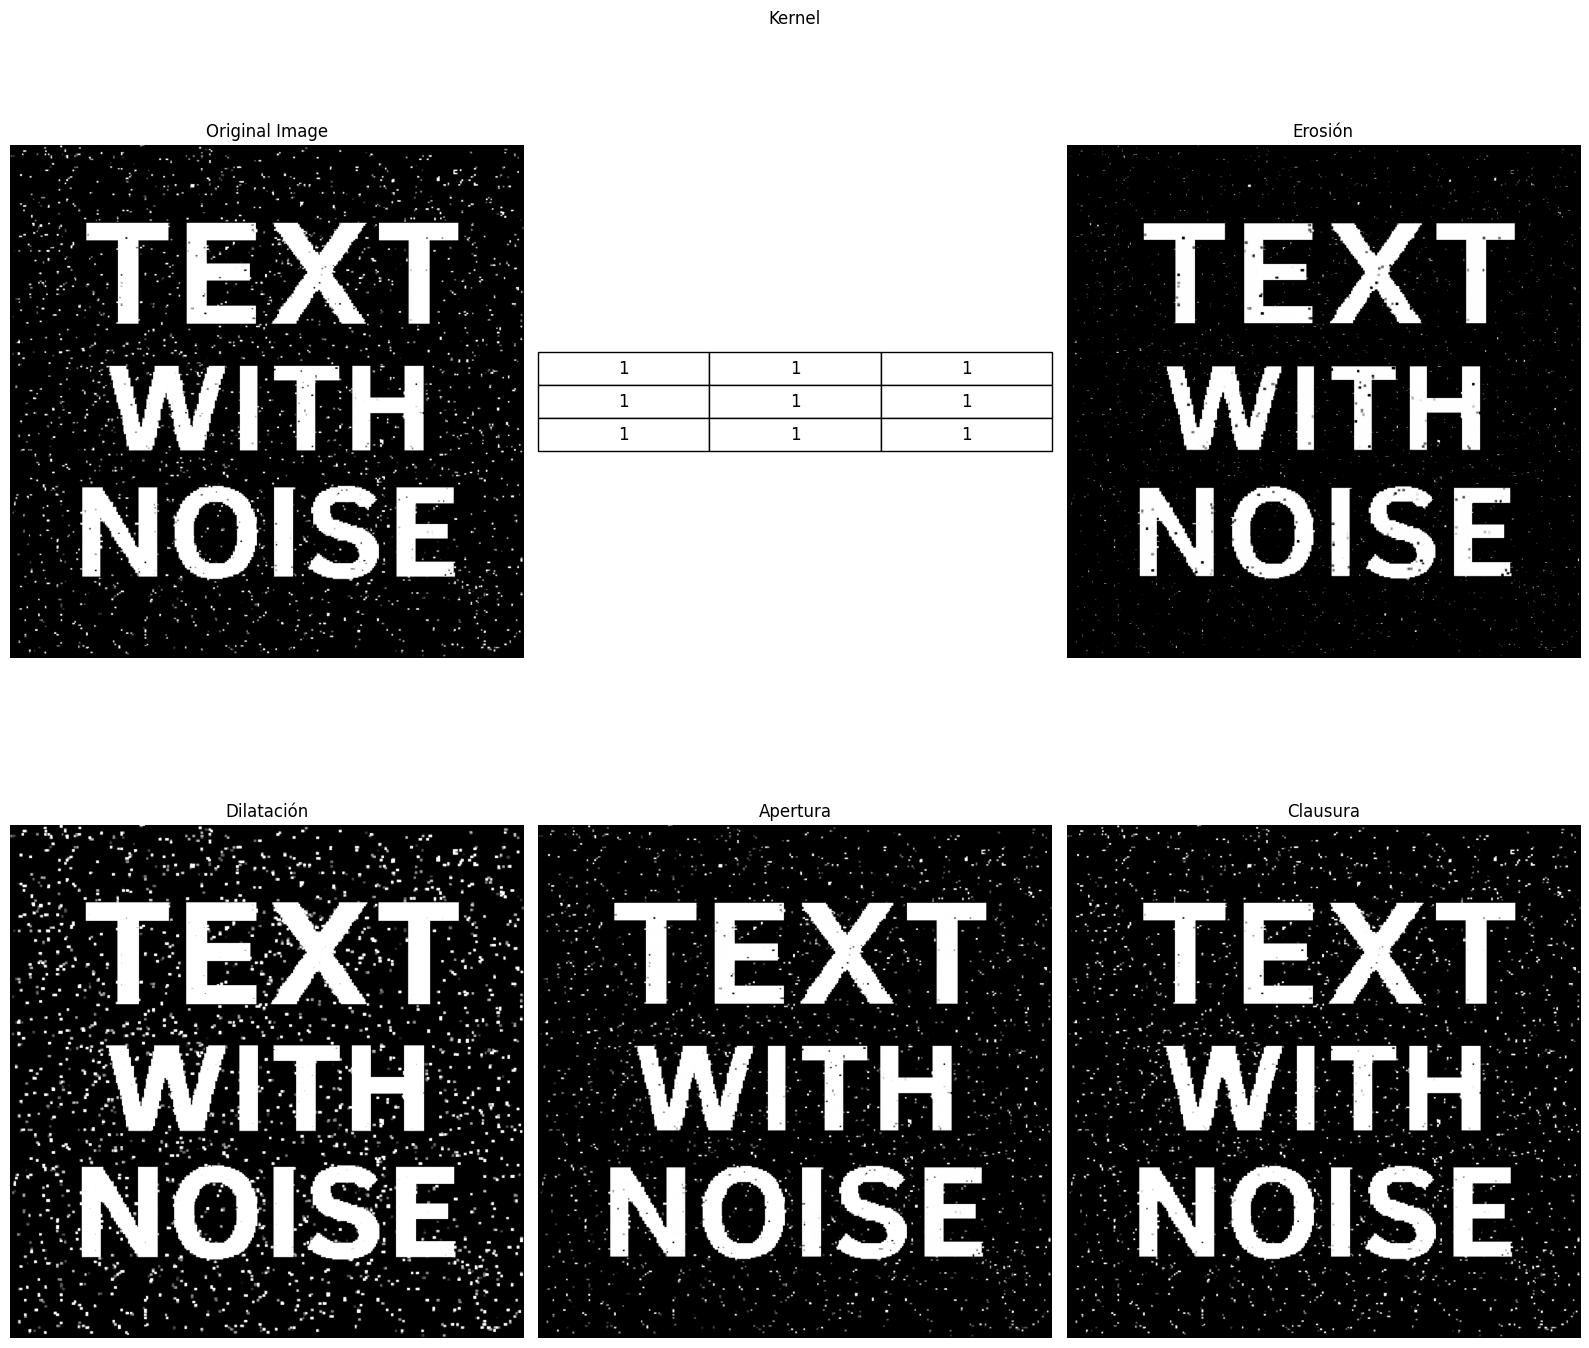

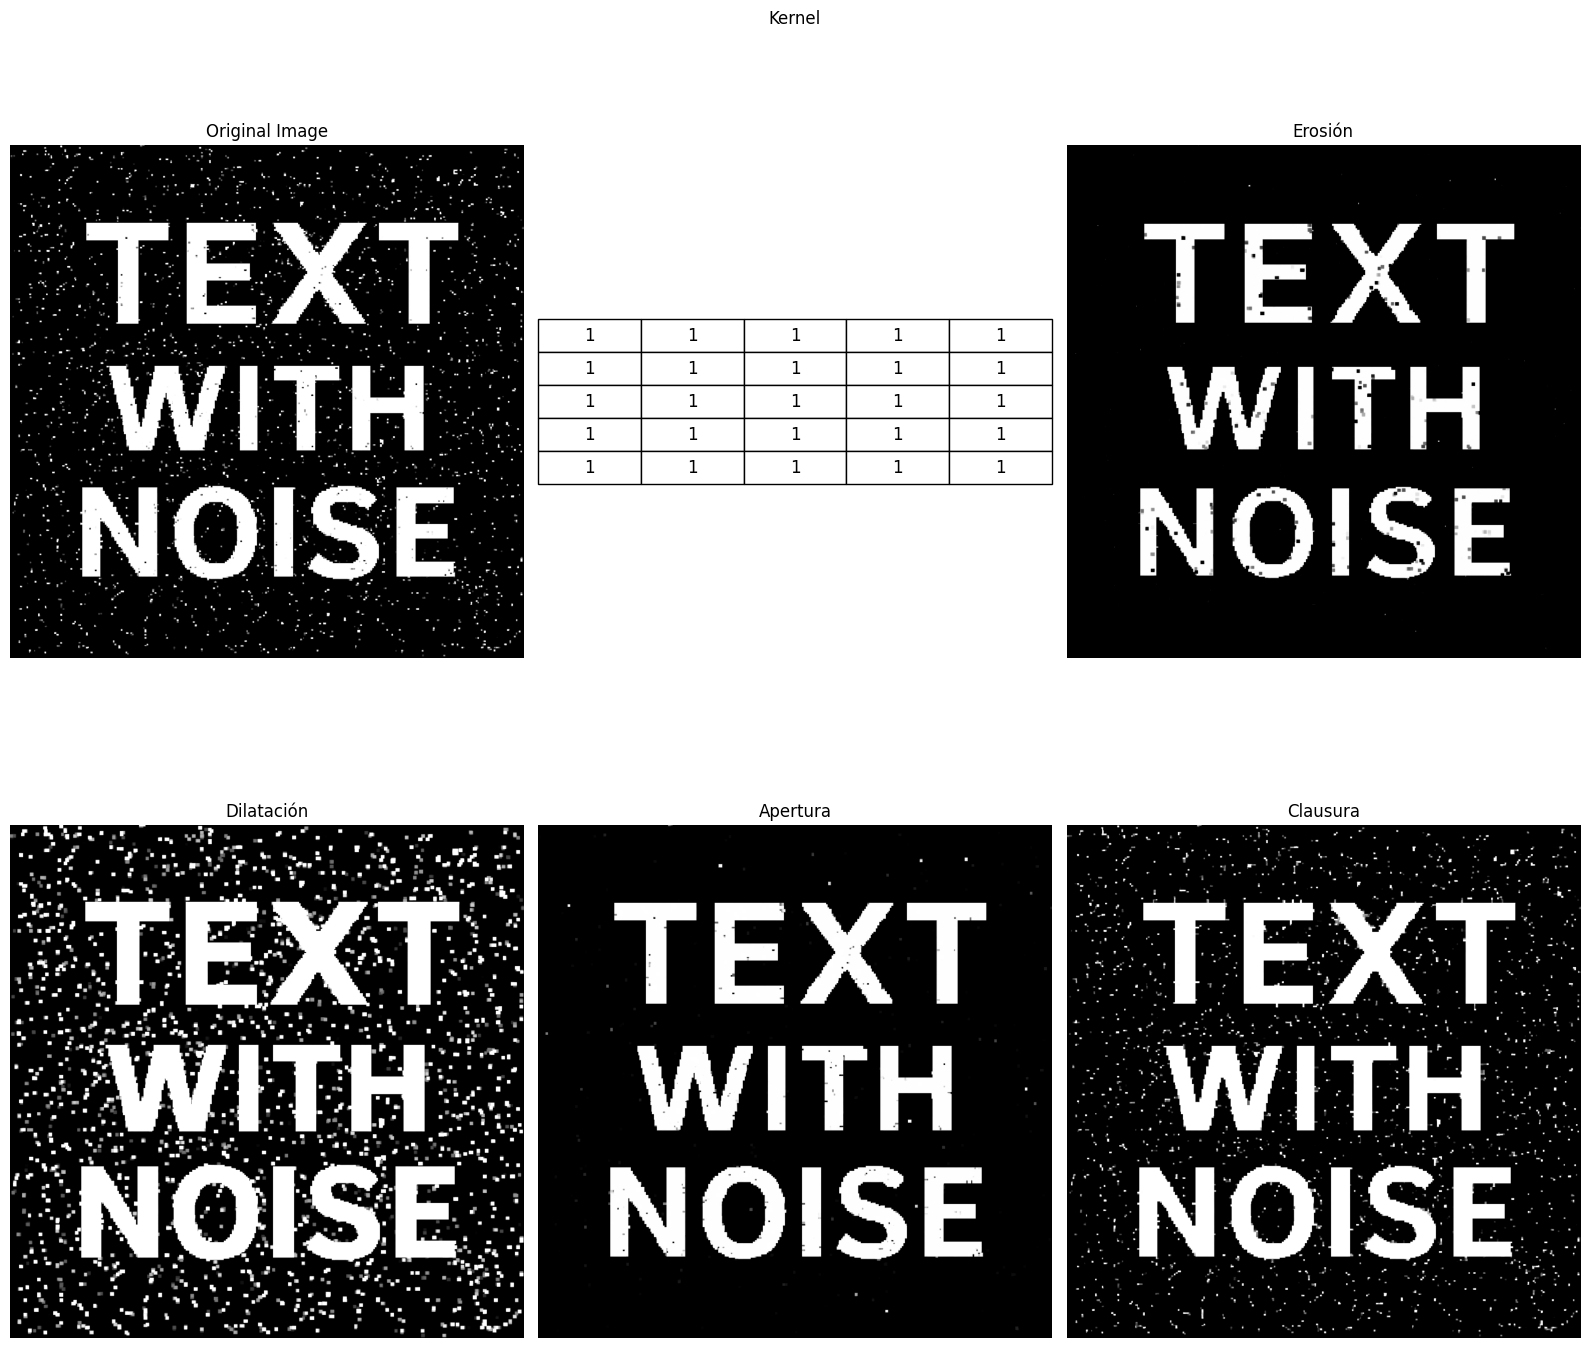

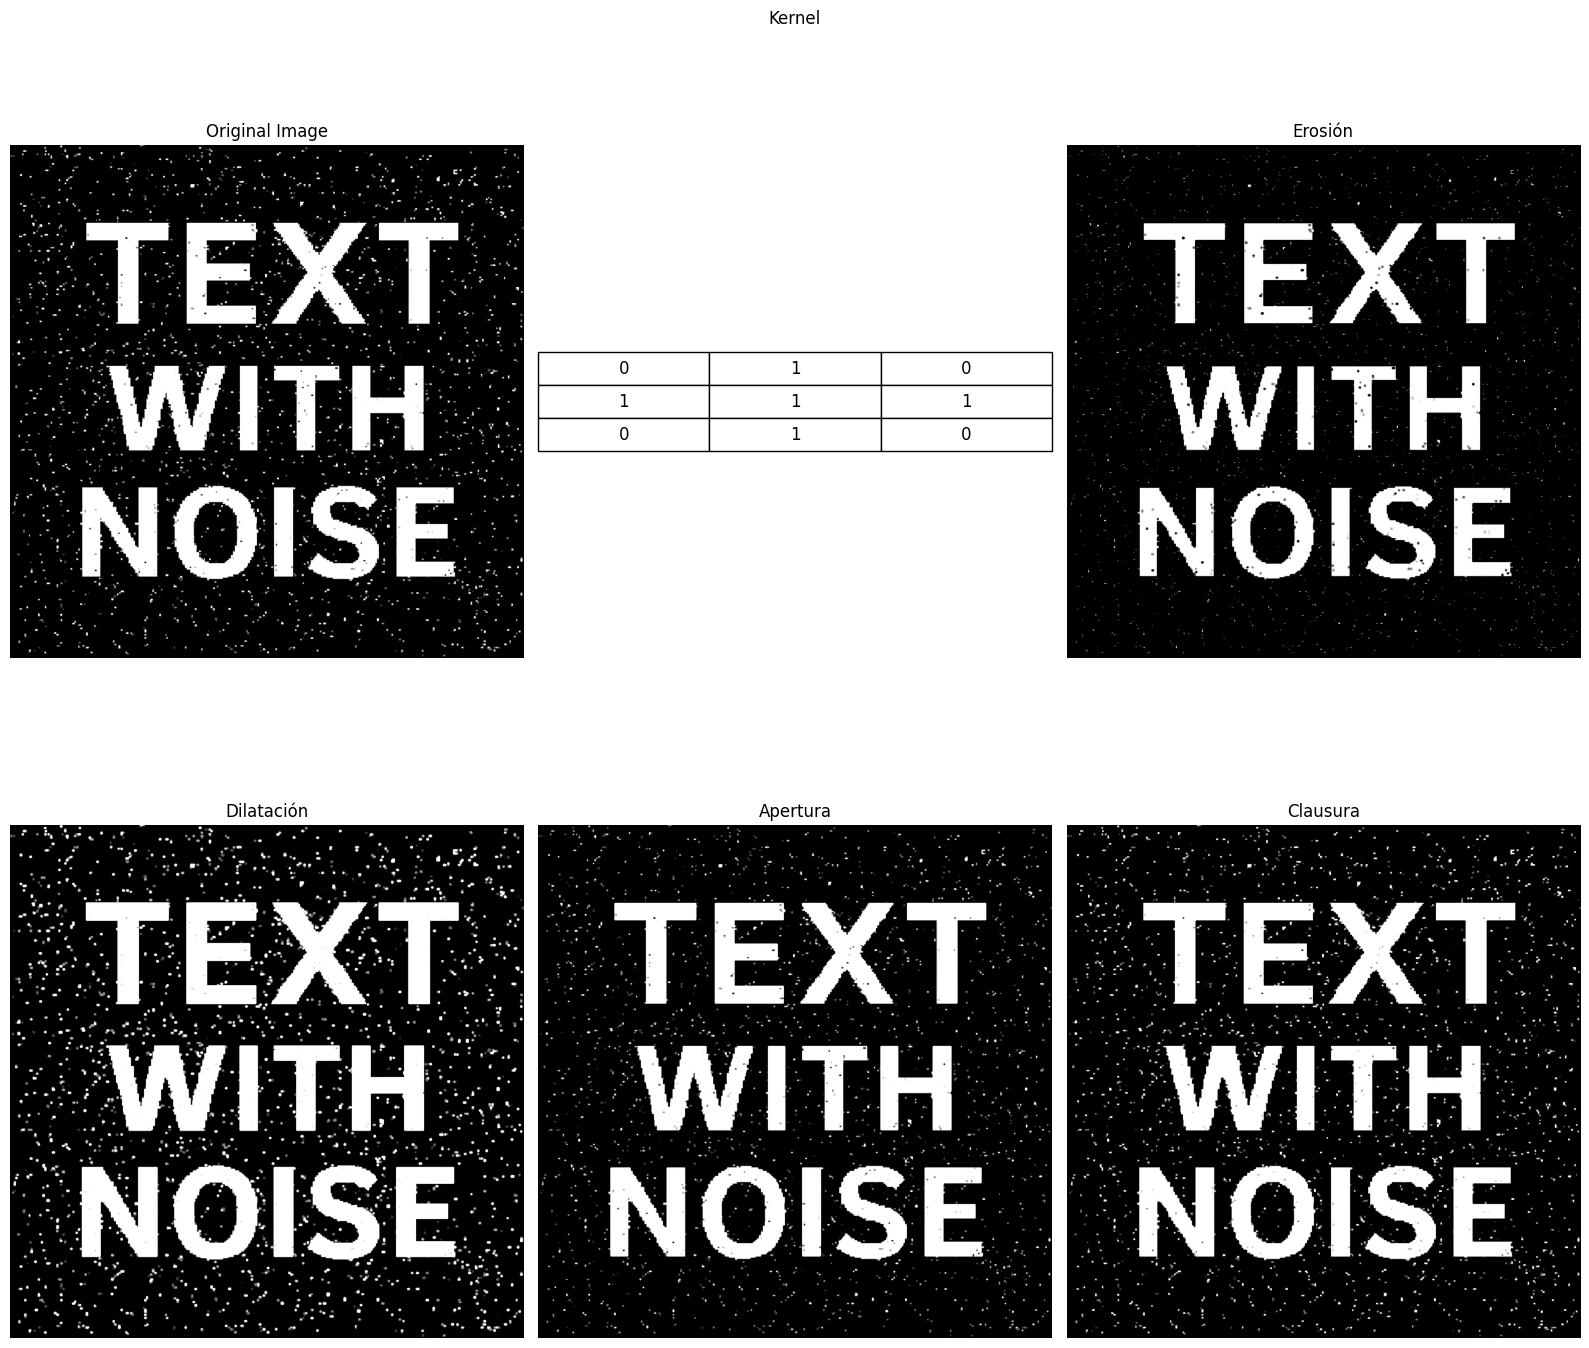

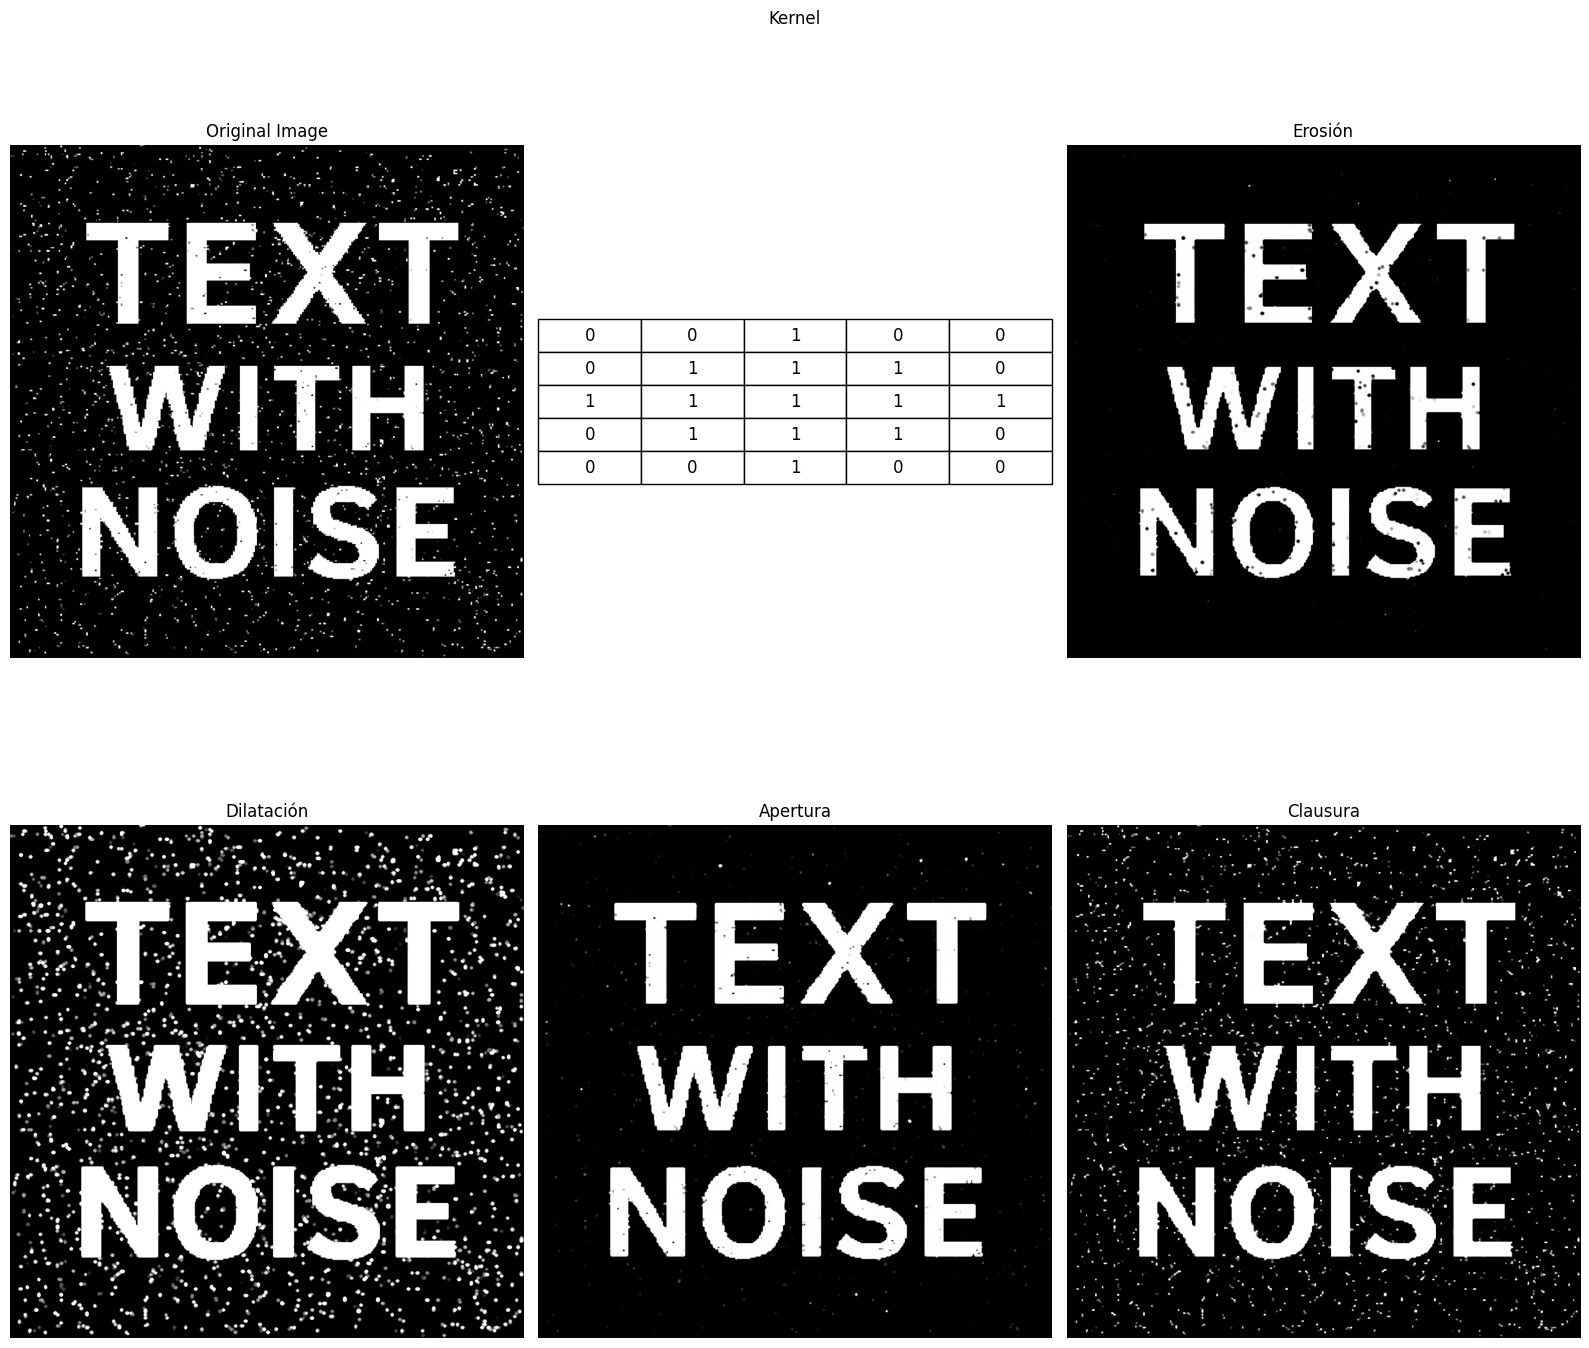

In [2]:
image_path = './img_binarias/bin2.png'

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel1 = np.ones((3, 3), np.uint8)
kernel2 = np.ones((5, 5), np.uint8)
## Cross kernel
kernel3 = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], np.uint8)
kernel4 = np.array([0,0,1,0,0,
                    0,1,1,1,0,
                    1,1,1,1,1,
                    0,1,1,1,0,
                    0,0,1,0,0], np.uint8).reshape(5,5)  

kernels = [kernel1, kernel2, kernel3, kernel4]

for i, kernel in enumerate(kernels):
    # Erosion
    erosion = cv2.erode(image, kernel, iterations=1)
    # Dilation
    dilation = cv2.dilate(image, kernel, iterations=1)
    # Opening
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    # Closing
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    # Display the results
    plt.figure(figsize=(16, 16))

    # 1. Original Image
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # 2. Kernel Display (as numeric matrix)
    ax_kernel = plt.subplot(2, 3, 2)
    ax_kernel.set_title('Kernel')
    ax_kernel.axis('off') 
    

    table = ax_kernel.table(cellText=kernel.astype(str),
                            loc='center',
                            cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)

    # 3. Erosion
    plt.subplot(2, 3, 3)
    plt.imshow(erosion, cmap='gray')
    plt.title('Erosión')
    plt.axis('off')

    # 4. Dilation
    plt.subplot(2, 3, 4)
    plt.imshow(dilation, cmap='gray')
    plt.title('Dilatación')
    plt.axis('off')

    # 5. Opening
    plt.subplot(2, 3, 5)
    plt.imshow(opening, cmap='gray')
    plt.title('Apertura')
    plt.axis('off')

    # 6. Closing
    plt.subplot(2, 3, 6)
    plt.imshow(closing, cmap='gray')
    plt.title('Clausura')
    plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
    plt.show()


    plt.show()

2. Erosi´on y dilataci´on sobre bordes detectados: Aplicar erosi´on/dilataci´on sobre una imagen de bordes
para ensanchar o suavizar l´ıneas.

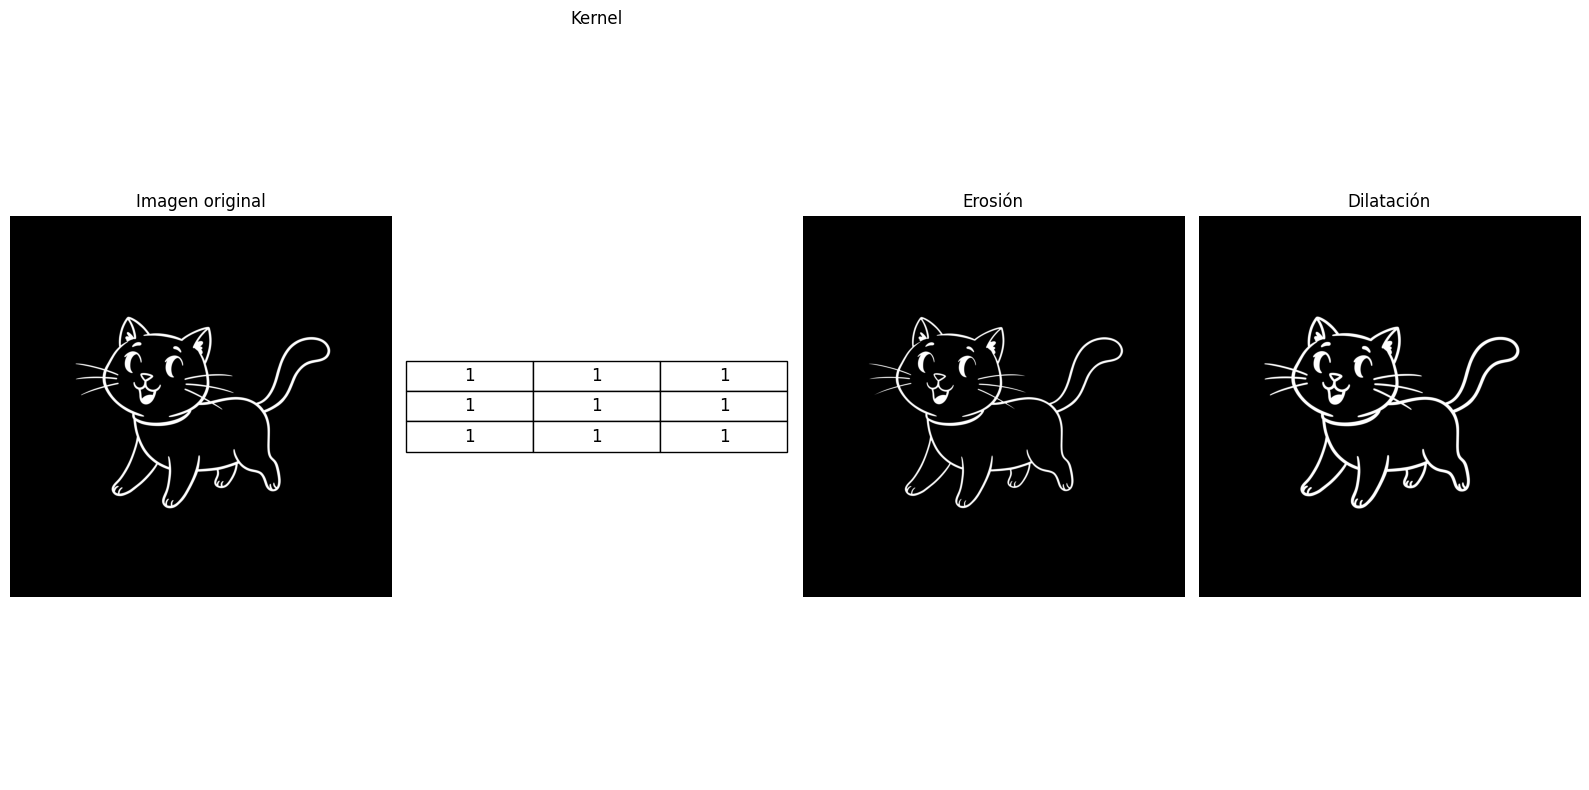

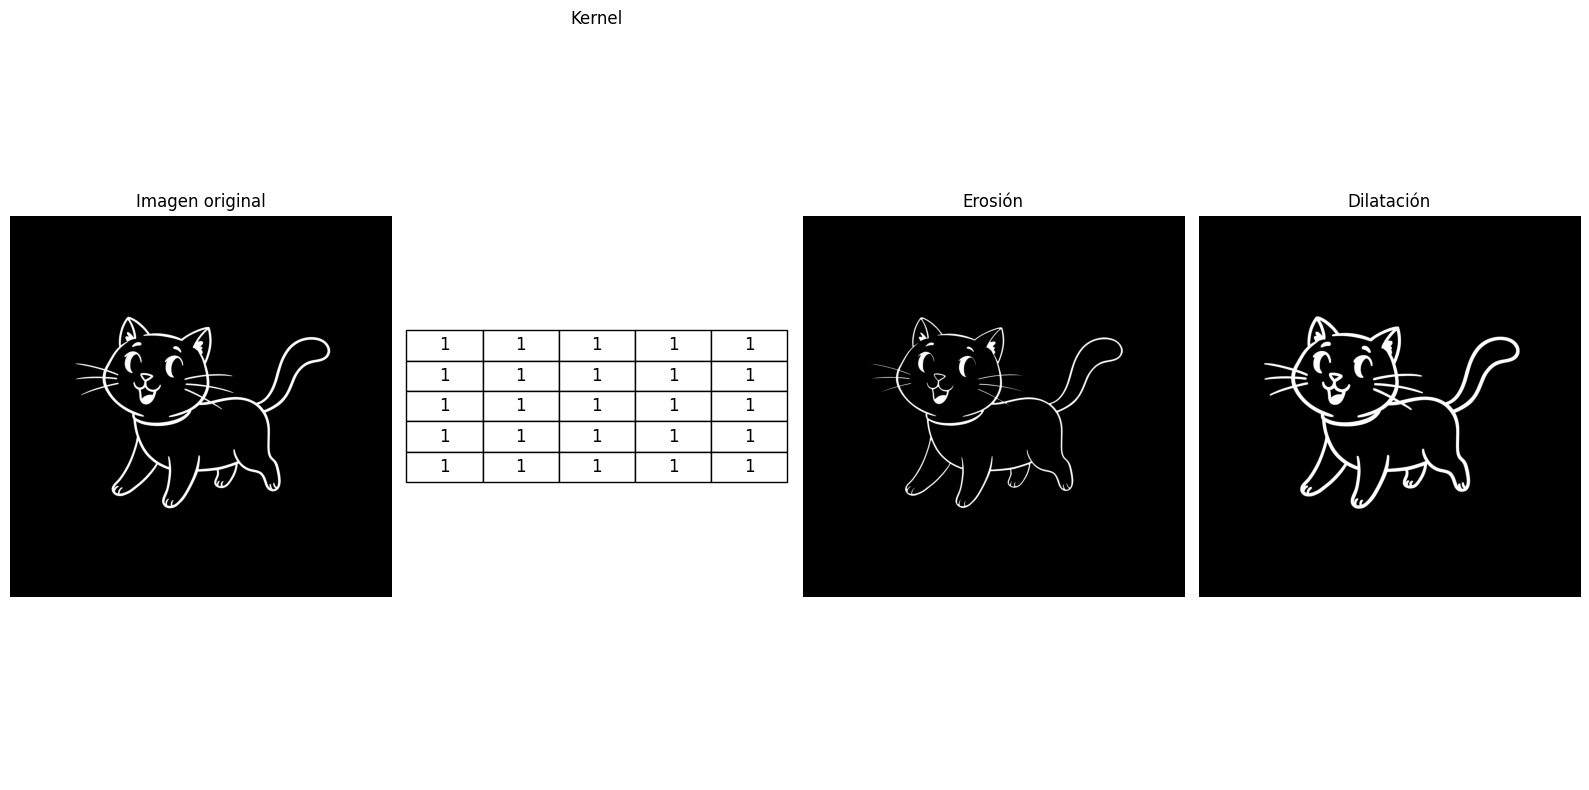

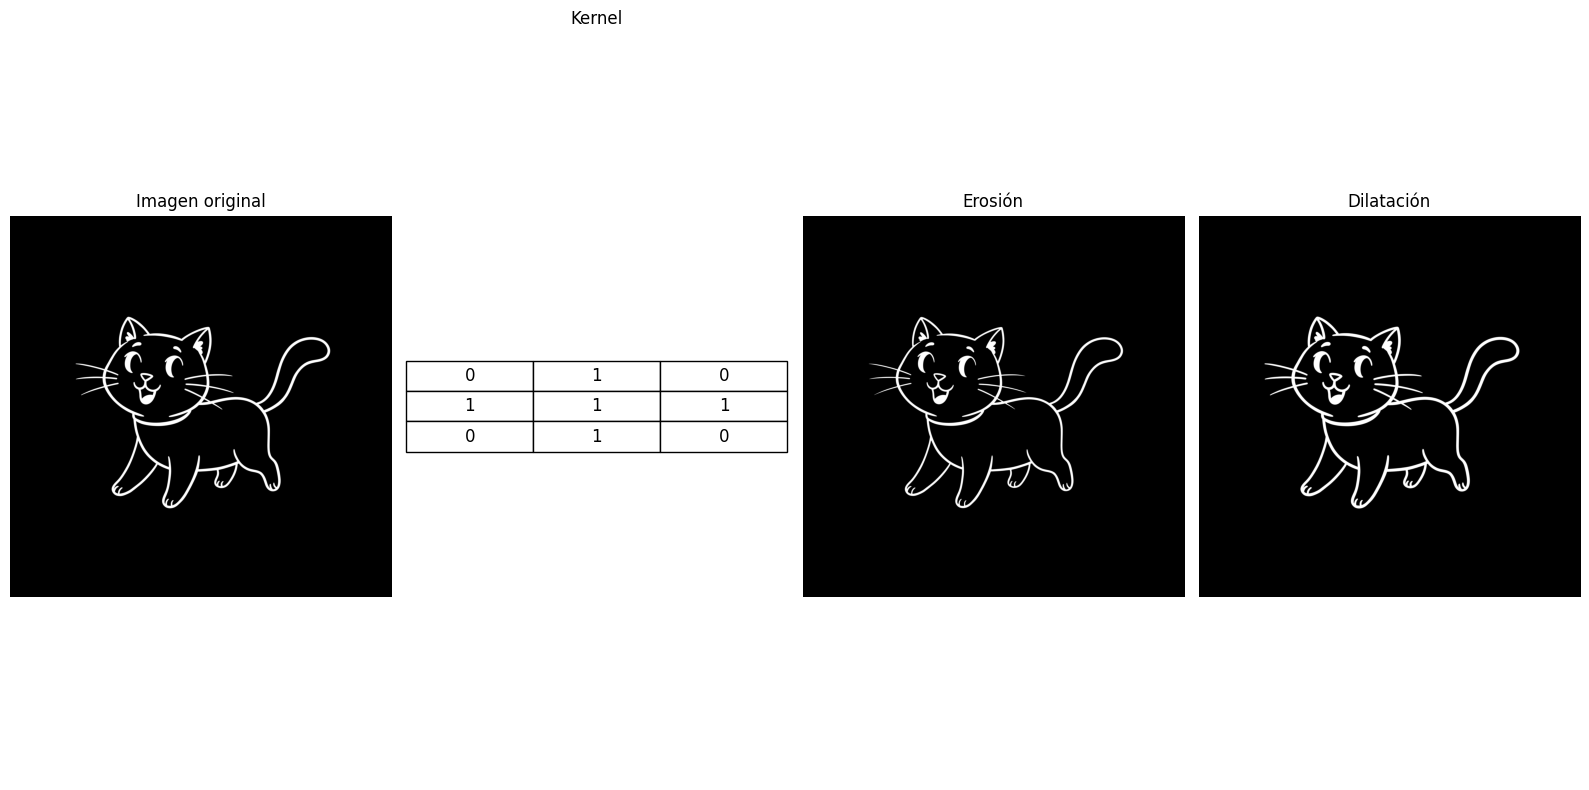

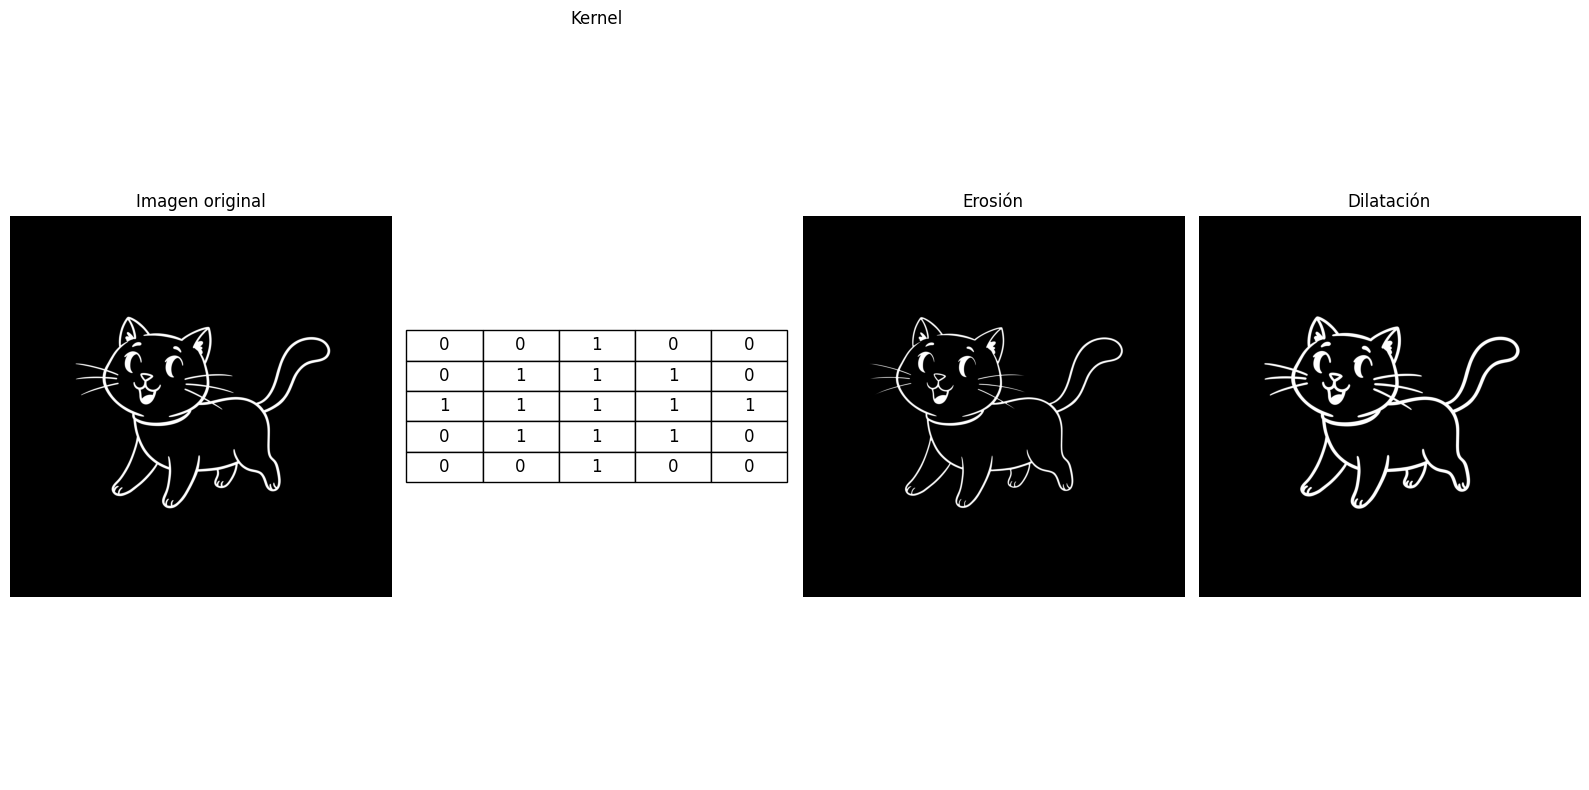

In [3]:
image_path = './img_binarias/bin4.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

for i, kernel in enumerate(kernels):
    erosion = cv2.erode(image, kernel, iterations=1)
    dilation = cv2.dilate(image, kernel, iterations=1)

    plt.figure(figsize=(16, 8))
    # 1. Original Image
    plt.subplot(1, 4, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Imagen original')
    plt.axis('off')

    # 2. kernel
    ax_kernel = plt.subplot(1, 4, 2)
    ax_kernel.set_title('Kernel')
    ax_kernel.axis('off')
    table = ax_kernel.table(cellText=kernel.astype(str),
                            loc='center',
                            cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)
    
    # 3. Erosion
    plt.subplot(1, 4, 3)
    plt.imshow(erosion, cmap='gray')
    plt.title('Erosión')
    plt.axis('off')

    # 4. Dilatacion
    plt.subplot(1, 4, 4)
    plt.imshow(dilation, cmap='gray')
    plt.title('Dilatación')
    plt.axis('off')

    plt.tight_layout() # Adjust rect to make space for suptitle
    plt.show()

3. Relleno de objetos usando clausura morfol´ogica: Aplicar clausura morfol´ogico para rellenar objetos
interrumpidos por ruido.

4. (*) Apertura y clausura morfol´ogica: Aplicar apertura y clausura para eliminar ruido o cerrar huecos.
Comparar la imagen original y la resultante de aplicar el operador. Comentar los efectos visuales.
Comparar con los resultados anteriores. Mostrar 4 subplots: original, apertura, cierre, diferencia
entre ambos.

Los efectos resultados fueron los siguientes:
La apertura elimina el ruido de fondo, eliminando casi todos los puntos pero sin rellenar los huecos. La clausura, por otro lado, rellena los huecos y elimina el ruido de fondo, pero no afecta a los objetos grandes. Al mostrar la diferencia (Clausura - Apertura) se puede ver una imagen que contiene casi únicamente el ruido de fondo y una pequeña silueta de las letras, ya que la apertura elimina el ruido de fondo y la clausura lo rellena. 
Ya que la imagen original no tenía grandes secciones sin conectar, la diferencia inversa (Apertura - Clausura) no muestra nada significativo y por eso no se muestra.

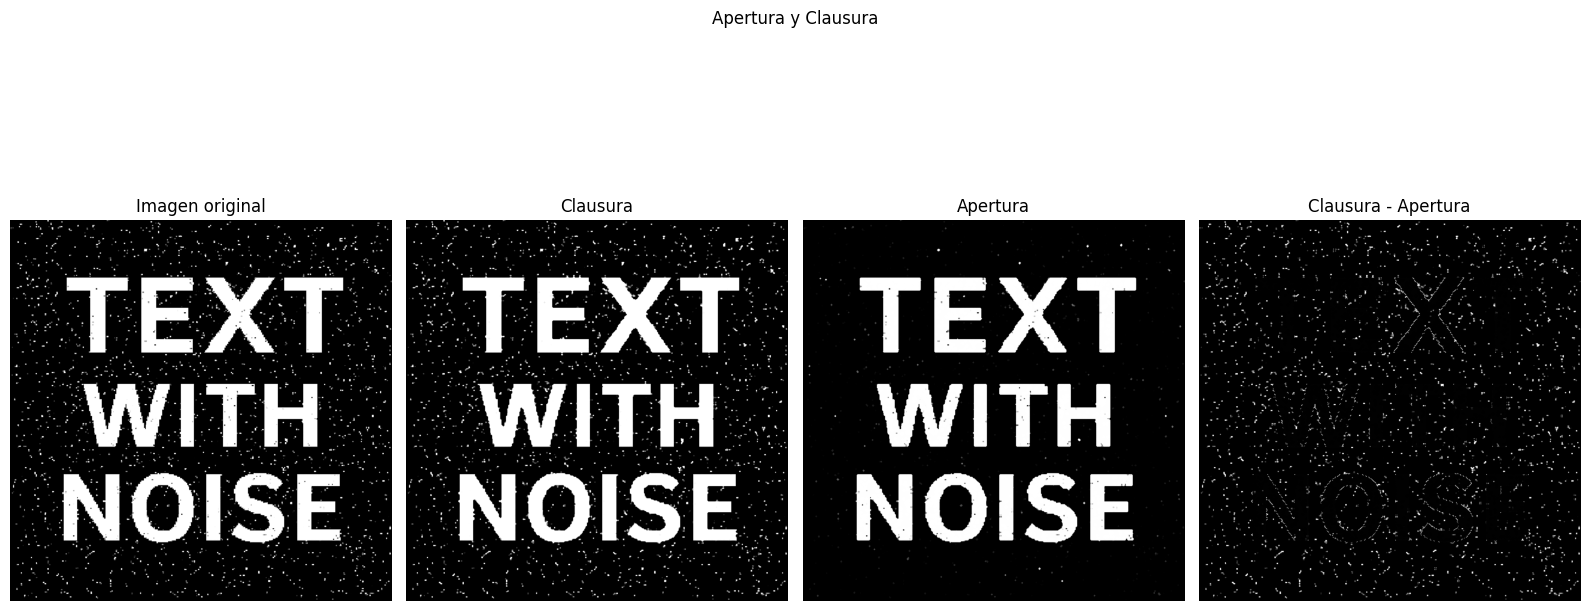

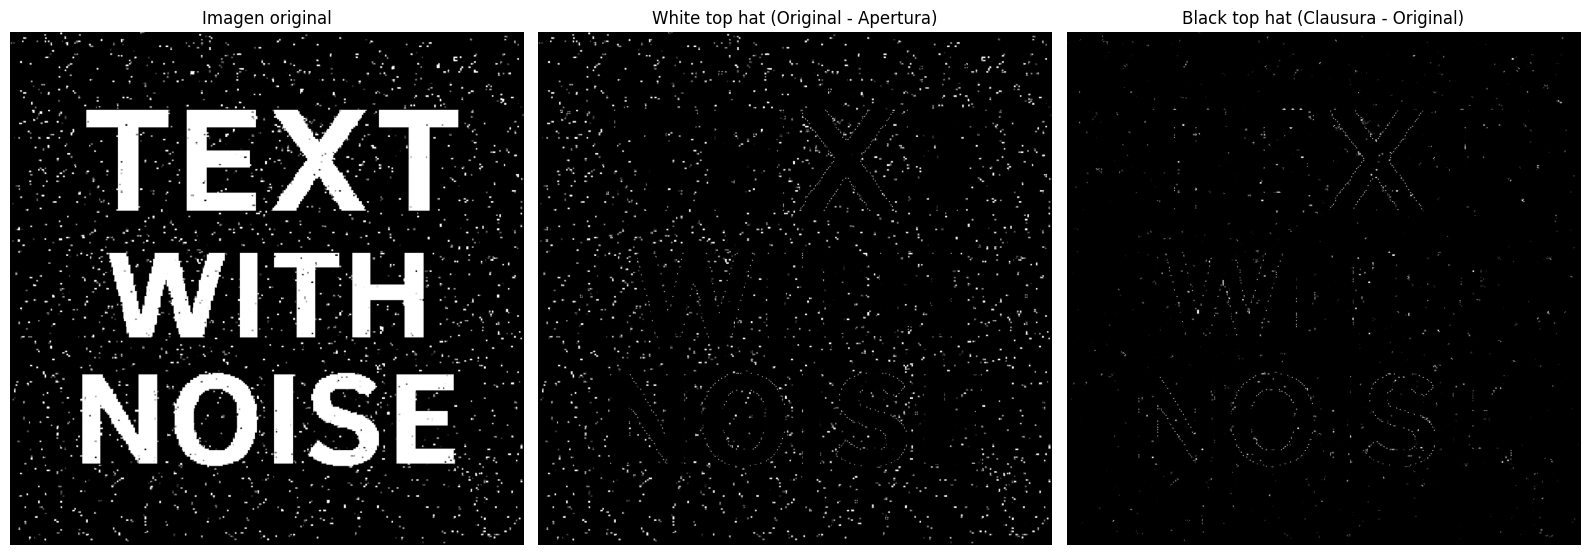

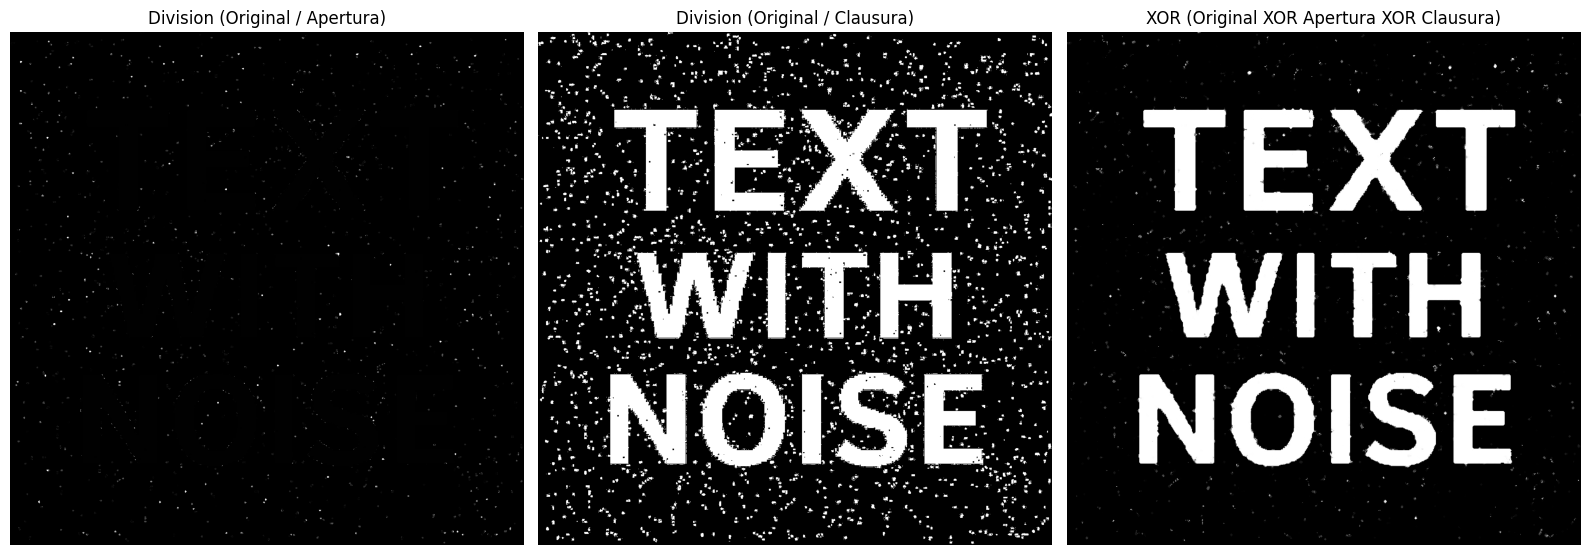

In [6]:
image_path = './img_binarias/bin2.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernelToUse = kernel4

# opening
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernelToUse)
# closing
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernelToUse)

plt.figure(figsize=(16, 8))
# 1. Original Image
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

# 2. clausura
plt.subplot(1, 4, 2)
plt.imshow(closing, cmap='gray')
plt.title('Clausura')
plt.axis('off')

# 3. apertura
plt.subplot(1, 4, 3)
plt.imshow(opening, cmap='gray')
plt.title('Apertura')
plt.axis('off')


#4. apertura - clausura
plt.subplot(1, 4, 4)
plt.imshow(cv2.subtract(closing,opening), cmap='gray')
plt.title('Clausura - Apertura')
plt.axis('off')
plt.suptitle('Apertura y Clausura')

plt.tight_layout() # Adjust rect to make space for suptitle
plt.show()



## Diferencias
## White top hat = Og - opening
## Black top hat = closing - Og

def substract_images(image1, image2):
    # Ensure both images are the same size
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions for subtraction.")
    
    # Subtract the images
    result = cv2.subtract(image1, image2)
    
    return result


wth = substract_images(image, opening)
bth = substract_images(closing, image)
plt.figure(figsize=(16, 8))
# 1. Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original')
plt.axis('off')
# 2. White top hat
plt.subplot(1, 3, 2)
plt.imshow(wth, cmap='gray')
plt.title('White top hat (Original - Apertura)')
plt.axis('off')
# 3. Black top hat
plt.subplot(1, 3, 3)
plt.imshow(bth, cmap='gray')
plt.title('Black top hat (Clausura - Original)')
plt.axis('off')
plt.tight_layout() # Adjust rect to make space for suptitle 
plt.show()

## Otros
plt.figure(figsize=(16, 8))

## Original / apertura
division = cv2.divide(image, opening)
plt.subplot(1, 3, 1)
plt.imshow(division, cmap='gray')
plt.title('Division (Original / Apertura)')
plt.axis('off')

## Original / clausura
division = cv2.divide(image, closing)
plt.subplot(1, 3, 2)
plt.imshow(division, cmap='gray')
plt.title('Division (Original / Clausura)')
plt.axis('off')

## Gradiente: apertura - clausura


## Original XOR Apertura XOR clausura
xor = cv2.bitwise_xor(image, opening)
xor = cv2.bitwise_xor(xor, closing)
plt.subplot(1, 3, 3)
plt.imshow(xor, cmap='gray')
plt.title('XOR (Original XOR Apertura XOR Clausura)')
plt.axis('off')


plt.tight_layout()
plt.show()


5. (*) Operaci´on de gradiente morfol´ogico: Aplicar el gradiente morfol´ogico (dilataci´on - erosi´on). Vi-
sualizar los bordes obtenidos mediante esta operaci´on.

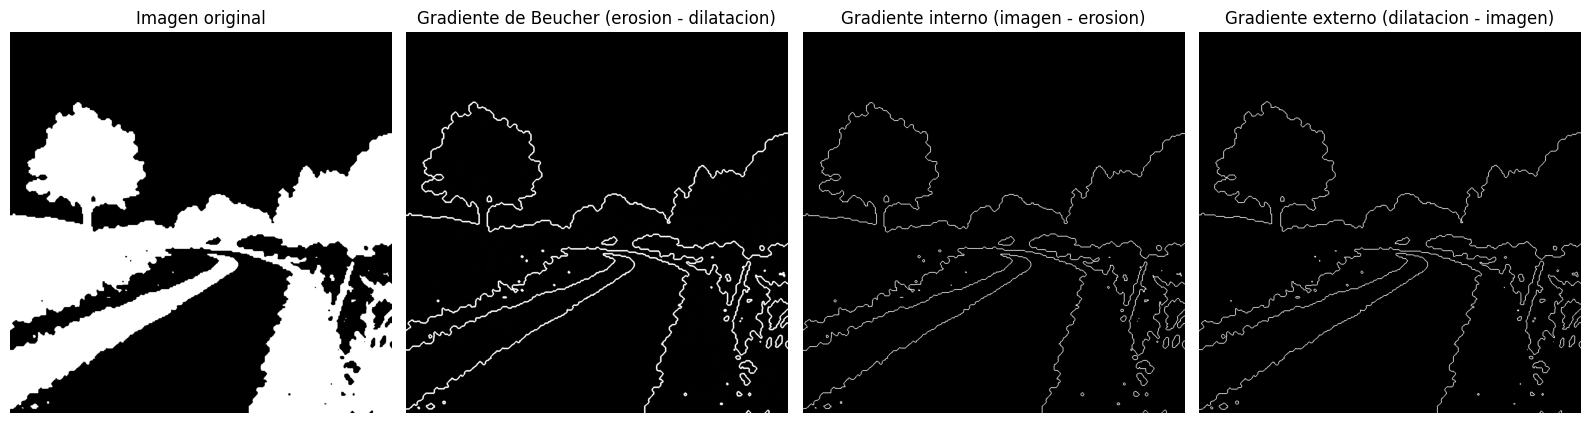

In [28]:
# Gradiente morfologico
image_path = './img_binarias/bin3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernelToUse = kernel4

# erosion
erosion = cv2.erode(image, kernelToUse, iterations=1)
# dilation
dilation = cv2.dilate(image, kernelToUse, iterations=1)
# opening
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernelToUse)
# closing
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernelToUse)

## Beucher gradient
beucher_gradient = cv2.subtract(dilation, erosion)

# Gradiente interno
internal_gradient = cv2.subtract(image,erosion)

# Gradiente externo
external_gradient = cv2.subtract(dilation,image)

plt.figure(figsize=(16, 8))
# 1. Original Image
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original')
plt.axis('off')
# 2. Beucher gradient
plt.subplot(1, 4, 2)
plt.imshow(beucher_gradient, cmap='gray')
plt.title('Gradiente de Beucher (erosion - dilatacion)')
plt.axis('off')
# 3. Internal gradient
plt.subplot(1, 4, 3)
plt.imshow(internal_gradient, cmap='gray')
plt.title('Gradiente interno (imagen - erosion)')
plt.axis('off')
# 4. External gradient
plt.subplot(1, 4, 4)
plt.imshow(external_gradient, cmap='gray')
plt.title('Gradiente externo (dilatacion - imagen)')
plt.axis('off')
plt.tight_layout()
plt.show()




6. Detecci´on de bordes con morfolog´ıa: Generar una imagen de bordes usando diferencia entre la imagen
original y su erosi´on o dilataci´on.

7. (*) Segmentaci´on b´asica con umbral + morfolog´ıa: Aplicar umbral, luego apertura y cierre para
mejorar el resultado. Ideal como paso previo a una segmentaci´on m´as elaborada

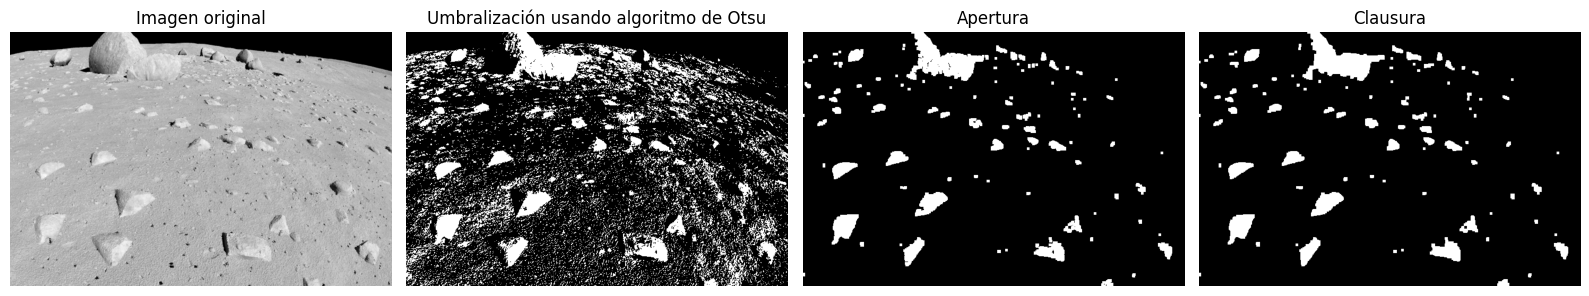

In [ ]:
image_path = "./img_binarias/render0036.png"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

## Umbralizacion usando otsu
_, binary_image = cv2.threshold(image, 175, 255, cv2.THRESH_BINARY)

## Apertura
kernel = np.ones((5, 5), np.uint8)

opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

## Cierre
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

## Mostrar resultados
plt.figure(figsize=(16, 8))
# 1. Original Image
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original')
plt.axis('off')
# 2. Imagen binaria
plt.subplot(1, 4, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Umbralización')
plt.axis('off')
# 3. Apertura
plt.subplot(1, 4, 3)
plt.imshow(opening, cmap='gray')
plt.title('Apertura')
plt.axis('off')
# 4. Clausura
plt.subplot(1, 4, 4)
plt.imshow(closing, cmap='gray')
plt.title('Clausura')
plt.axis('off')

plt.tight_layout()
plt.show()
